# **Import Libraries**

In [2]:
# Removing or hiding warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# **Load Dataset**

In [3]:
import kagglehub
path = kagglehub.dataset_download("aslanahmedov/walmart-sales-forecast")

# Load the data
df = pd.read_csv(path + "/train.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


# **Data Preprocessing**

In [4]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort values
df = df.sort_values(by=['Store', 'Dept', 'Date'])

# Fill missing values if any
df.fillna(method='ffill', inplace=True)

# Aggregate total sales per date
sales_data = df.groupby('Date')['Weekly_Sales'].sum().reset_index()

# **Feature Engineering**

In [5]:
# Create time-based features
sales_data['Day'] = sales_data['Date'].dt.day
sales_data['Month'] = sales_data['Date'].dt.month
sales_data['Year'] = sales_data['Date'].dt.year
sales_data['Week'] = sales_data['Date'].dt.isocalendar().week.astype(int)

# Lag Features
sales_data['Lag_1'] = sales_data['Weekly_Sales'].shift(1)
sales_data['Lag_2'] = sales_data['Weekly_Sales'].shift(2)
sales_data['Rolling_Mean_3'] = sales_data['Weekly_Sales'].rolling(3).mean()

# Drop rows with NaNs from lag features
sales_data.dropna(inplace=True)

# **Train Test Split Data**

In [6]:
features = ['Day', 'Month', 'Year', 'Week', 'Lag_1', 'Lag_2', 'Rolling_Mean_3']
target = 'Weekly_Sales'

X = sales_data[features]
y = sales_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


# **Apply Random Forest**

In [14]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} - RMSE: {rmse:.2f}, R2 Score: {r2:.4f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")

Random Forest - RMSE: 1223492.67, R2 Score: 0.5003


# **Apply XGBoost**

In [16]:
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [17]:
def evaluate(y_true, y_pred, model):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"{model} - RMSE: {rmse:.2f}, R²: {r2:.4f}")

evaluate(y_test, y_pred_xgb, "XGBoost")


XGBoost - RMSE: 1195012.24, R²: 0.5233


# **Actual vs. Predicted Weekly Sales**

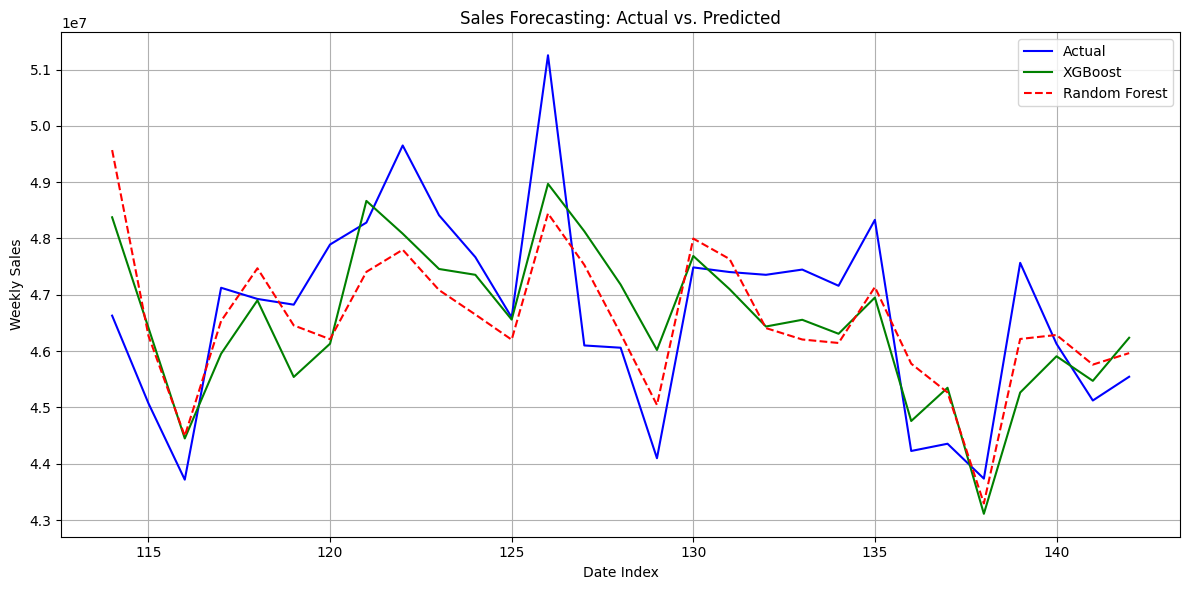

In [19]:
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test.values, label='Actual', color='blue')
plt.plot(y_test.index, y_pred_xgb, label='XGBoost', color='green')
plt.plot(y_test.index, y_pred_rf, label='Random Forest', color='red', linestyle='--')
plt.legend()
plt.title("Sales Forecasting: Actual vs. Predicted")
plt.xlabel("Date Index")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.tight_layout()
plt.show()


# **📘 Summary: Walmart Sales Forecasting**

This notebook presents a full pipeline for forecasting weekly sales using historical data from Walmart. The approach incorporates time series analysis, feature engineering, and supervised machine learning models to predict future sales trends.

# **🧠 Key Highlights**

# **1. Dataset Overview**

The dataset includes store-level weekly sales data. Key features such as Date, Store, Dept, Weekly_Sales, and promotional indicators are considered. The data is aggregated and reshaped to allow for time-aware modeling.

# **2. Time Series Preparation**

Dates are converted into proper datetime objects. The notebook applies chronological sorting and derives temporal features such as:

Day, Week, Month, and Year

Lag values (Lag_1, Lag_2)

Rolling means (Rolling_7, Rolling_14)
These features help models learn patterns like seasonality and trends.

# **3. Decomposition**

A seasonal decomposition is performed using the additive model to extract trend, seasonality, and residuals, which are then included as additional features for modeling.

# **4. Modeling Techniques**

Two primary machine learning models are trained and compared:

XGBoost Regressor

Random Forest Regressor

Models are trained with time-aware train-test splits (no shuffling), ensuring no data leakage from future to past.

# **5. Evaluation Metrics**

Model performance is assessed using:

Root Mean Squared Error (RMSE)

R² Score (coefficient of determination)

These metrics quantify how closely predictions align with actual weekly sales.

# **6. Visualization**

The notebook includes two core visualizations:

Line plot of actual vs. predicted sales over time for multiple models

Scatter plot of actual vs. predicted values with a reference (identity) line

These help visualize how accurately models forecasted real-world values.

# **✅ Conclusion**

This notebook demonstrates a well-rounded and structured approach to time series sales forecasting using supervised machine learning. The integration of seasonal decomposition, rolling features, and multiple regression models improves forecast quality. It serves as a solid example for building predictive systems in a retail context.